# Points of interest

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [42]:
pois = pd.read_csv("./pois.txt", sep=":")
pois

,id,name,addr
0,1,Home,"6119 Mustang Ln NW, Albuquerque, NM 87120"
1,2,Sprouts,"5600 Coors Blvd NW, Albuquerque, NM 78120"
2,3,Community Center,"4900 Kachina NW, Albuquerque, NM 87120"
3,4,Botanical Gardens,"2601 Central Ave NW, Albuquerque, NM 87104"
4,5,UNM,"University of New Mexico, Albuquerque, NM 87131"


In [43]:
from geopandas.tools import geocode

pois_gdf = geocode(
    pois["addr"], provider="nominatim", 
    user_agent="biscotty", timeout=10
)
pois_gdf

,geometry,address
0,POINT (-106.70813 35.14749),"6119, Mustang Lane Northwest, Albuquerque, Ber..."
1,POINT (-106.68659 35.14657),"Sprouts Farmers Market, 5600, Coors Boulevard ..."
2,POINT (-106.6947 35.15459),"Don Newton Taylor Ranch Community Center, 4900..."
3,POINT (-106.68555 35.09676),"ABQ BioPark: Zoo, Aquarium, Botanic Garden, 26..."
4,POINT (-106.62021 35.08663),"University of New Mexico, Princeton Drive Nort..."


In [44]:
pois_gdf = pois_gdf.join(pois)
print(pois_gdf)

                      geometry  \
0  POINT (-106.70813 35.14749)   
1  POINT (-106.68659 35.14657)   
2   POINT (-106.6947 35.15459)   
3  POINT (-106.68555 35.09676)   
4  POINT (-106.62021 35.08663)   

                                             address  id               name  \
0  6119, Mustang Lane Northwest, Albuquerque, Ber...   1               Home   
1  Sprouts Farmers Market, 5600, Coors Boulevard ...   2            Sprouts   
2  Don Newton Taylor Ranch Community Center, 4900...   3   Community Center   
3  ABQ BioPark: Zoo, Aquarium, Botanic Garden, 26...   4  Botanical Gardens   
4  University of New Mexico, Princeton Drive Nort...   5                UNM   

                                              addr  
0        6119 Mustang Ln NW, Albuquerque, NM 87120  
1        5600 Coors Blvd NW, Albuquerque, NM 78120  
2           4900 Kachina NW, Albuquerque, NM 87120  
3       2601 Central Ave NW, Albuquerque, NM 87104  
4  University of New Mexico, Albuquerque, NM 87131  


In [45]:
import contextily as ctx
from pyproj import CRS

In [46]:
pois_gdf = pois_gdf.to_crs(4269)
pois_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

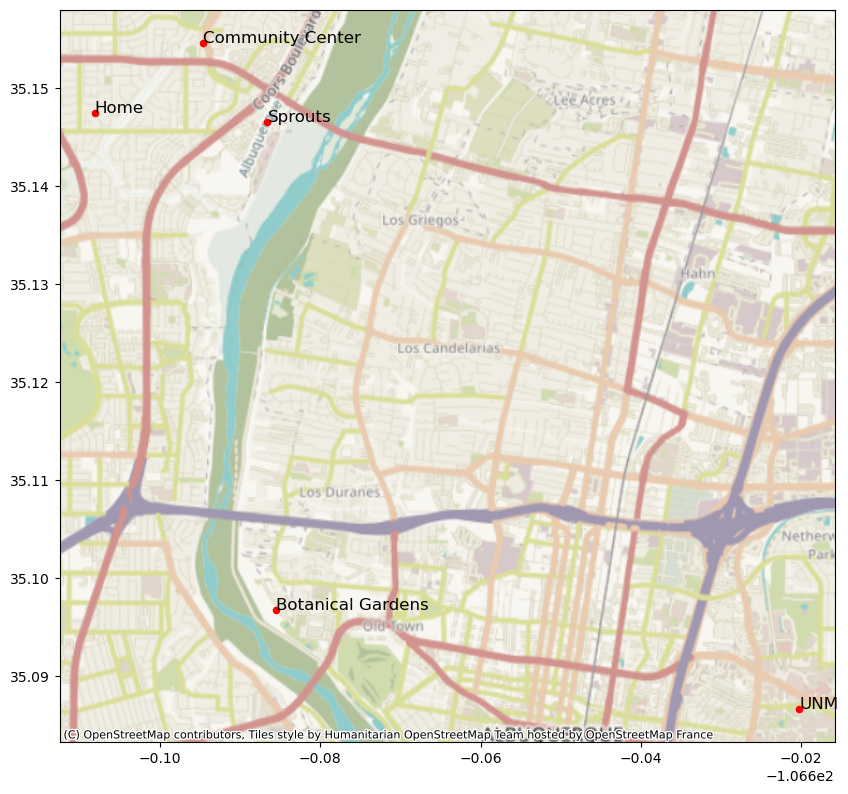

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = pois_gdf.plot(markersize=20, color='red', figsize=(10,10))
texts = []

for x, y, label in zip(pois_gdf.geometry.x, pois_gdf.geometry.y, pois_gdf['name']): 
    texts.append(plt.text(x, y, label, fontsize=12))
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.HOT, 
                crs=pois_gdf.crs)

In [48]:
pois_gdf.to_file("../../data/local/poi.gpkg", driver='GPKG')